### Import required packages

In [1]:
# import required packages
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced data visualization
import warnings  # to suppress unnecessary warnings

# Suppress warnings to enhance code readability
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
# reads 'ds2.xls' as a pandas dataframe
df = pd.read_excel("../data/DS2.xls", engine="xlrd")

# displays the top 5 rows of the dataframe
df.head()

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


### Handling Missing Values

In [3]:
# counting null values in each column of the dataframe
df.isna().sum()

X    0
Y    0
dtype: int64

### Summary Statistics

In [4]:
# gives summary stats for each field in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,13.0,5.953846,1.714942,2.9,4.9,6.0,6.7,9.8
Y,13.0,5.569231,1.314271,4.0,4.4,5.2,6.1,7.9


### Outliers Removal

In [5]:
# calculate z-scores for each element in the dataFrame
# define a threshold for identifying outliers (e.g., z-score > 3 for extreme outliers)
np.where(df.apply(lambda x: (x - x.mean()) / x.std()) > 3)

(array([], dtype=int64), array([], dtype=int64))

In [6]:
# remove rows with outliers based on the threshold
df.drop(np.where(df.apply(lambda x: (x - x.mean()) / x.std()) > 3)[0], inplace=True)

### Data Normalization

In [7]:
# normalize each column in the DataFrame 'df' by subtracting the mean and dividing by the standard deviation.
df = df.apply(lambda x: (x - x.mean()) / x.std())

### Data Visualization

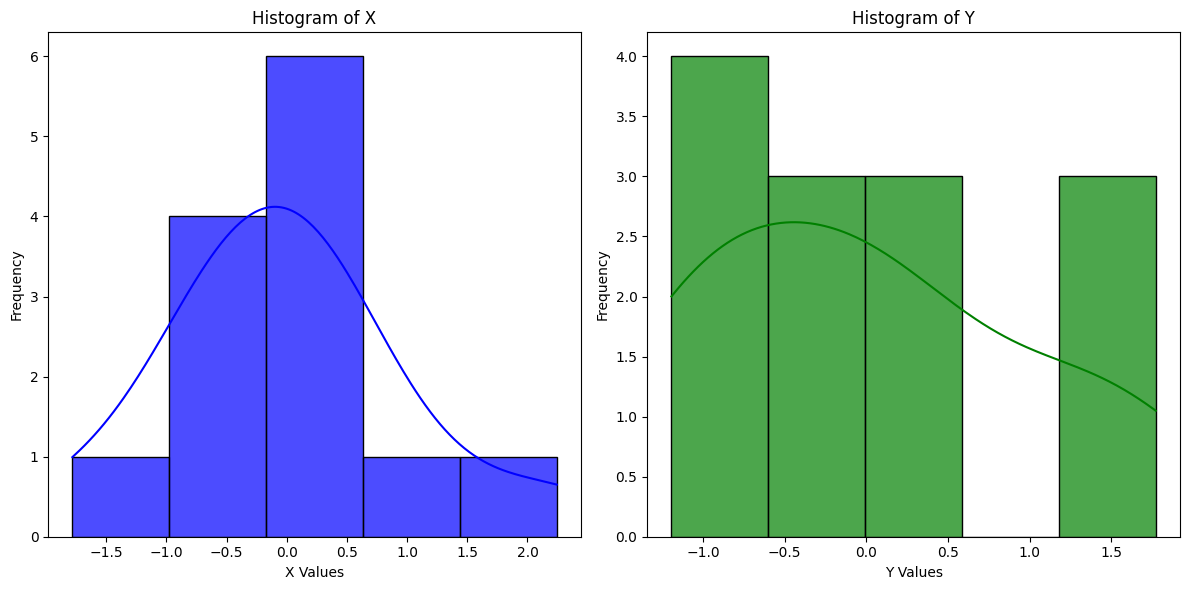

In [8]:
# create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# plot a histogram for the 'X' column in the first subplot
sns.histplot(df["X"], color="blue", alpha=0.7, kde=True, ax=axes[0])
axes[0].set_title("Histogram of X")
axes[0].set_xlabel("X Values")
axes[0].set_ylabel("Frequency")

# plot a histogram for the 'Y' column in the second subplot
sns.histplot(df["Y"], color="green", alpha=0.7, kde=True, ax=axes[1])
axes[1].set_title("Histogram of Y")
axes[1].set_xlabel("Y Values")
axes[1].set_ylabel("Frequency")

# ensure proper spacing between subplots
plt.tight_layout()

# show the plot
plt.show()

### Model Building

In [9]:
from sklearn.model_selection import train_test_split

# define a function for the linear regression model: Y = b0 + b1 * X


def linear_regression(x: pd.Series, b0: float, b1: float) -> pd.Series:
    """
    Calculate the linear regression model prediction.

    Args:
        x (pd.Series): The predictor variable (X).
        b0 (float): The intercept.
        b1 (float): The slope.

    Returns:
        pd.Series: The predicted values.
    """
    return b0 + b1 * x


# define a function to calculate the intercept (b0) of the linear regression model.


def calculate_intercept(x: pd.Series, y: pd.Series, b1: float) -> float:
    """
    Calculate the intercept (b0) of the linear regression model.

    Args:
        x (pd.Series): The predictor variable (X).
        y (pd.Series): The target variable (Y).
        b1 (float): The slope.

    Returns:
        float: The intercept (b0) of the linear regression model.
    """
    return y.mean() - b1 * x.mean()


# define a function to calculate the slope (b1) of the linear regression model.


def calculate_slope(x: pd.Series, y: pd.Series) -> float:
    """
    Calculate the slope (b1) of the linear regression model.

    Args:
        x (pd.Series): The predictor variable (X).
        y (pd.Series): The target variable (Y).

    Returns:
        float: The slope (b1) of the linear regression model.
    """
    return ((x - x.mean()) * (y - y.mean())).sum() / ((x - x.mean()) ** 2).sum()


# split the data into X and y variables
predictor, target = df["X"], df["Y"]

# split the data into training and test sets (80% train, 20% test)
predictor_train, predictor_test, target_train, target_test = train_test_split(
    predictor, target, test_size=0.2, random_state=42
)

# calculate the slope (b1) of the linear regression model using training data
b1 = calculate_slope(predictor_train, target_train)

# calculate the intercept (b0) of the linear regression model using training data
b0 = calculate_intercept(predictor_train, target_train, b1)

# predict the target variable (Y) using the linear regression model on the test data
predicted_test = linear_regression(predictor_test, b0, b1)

# predict the target variable (Y) using the linear regression model on the training data
predicted_train = linear_regression(predictor_train, b0, b1)

# display the first 5 predicted values on the test set
predicted_test[:5]

11   -0.854428
9    -0.465437
0    -1.687981
Name: X, dtype: float64

### Model Evalution

In [10]:
# define a function to calculate Mean Squared Error (MSE)
def mse(y: pd.Series, y_pred: pd.Series) -> float:
    """
    Calculate the Mean Squared Error (MSE) between the actual and predicted values.

    Args:
        y (pd.Series): The actual target values.
        y_pred (pd.Series): The predicted values.

    Returns:
        float: The MSE.
    """
    return ((y - y_pred) ** 2).mean()


# define a function to calculate R-squared (R2) score


def r_squared(y: pd.Series, y_pred: pd.Series) -> float:
    """
    Calculate the R-squared (R2) score between the actual and predicted values.

    Args:
        y (pd.Series): The actual target values.
        y_pred (pd.Series): The predicted values.

    Returns:
        float: The R2 score.
    """
    return 1 - ((y - y_pred) ** 2).sum() / ((y - y.mean()) ** 2).sum()


print(f"Slope : {b0}")
print(f"Intercept : {b1}")
print(f"R2 score : {r_squared(target_test, predicted_test)}")
print(f"Mean Square Error : {mse(target_test, predicted_test)}")

Slope : 0.009046659108695676
Intercept : 0.9529963697136241
R2 score : -11.46853493656554
Mean Square Error : 0.19249286768763874


### Cross Verification

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create a Linear Regression model
model = LinearRegression()

# fit the model on the training data
model.fit(predictor_train.values.reshape(-1, 1), target_train)

# predict the target variable (Y) using the model on the test data
predicted_test = model.predict(predictor_test.values.reshape(-1, 1))

# calculate and display the R2 score and MSE for the test dataset
r2_test = r2_score(target_test, predicted_test)
mse_test = mean_squared_error(target_test, predicted_test)

print(f"Intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_[0]}")
print(f"R2 score (Test): {r2_test}")
print(f"Mean Squared Error (Test): {mse_test}")

Intercept (b0): 0.009046659108695676
Slope (b1): 0.952996369713624
R2 score (Test): -11.468534936565538
Mean Squared Error (Test): 0.1924928676876387


### Prediction Line

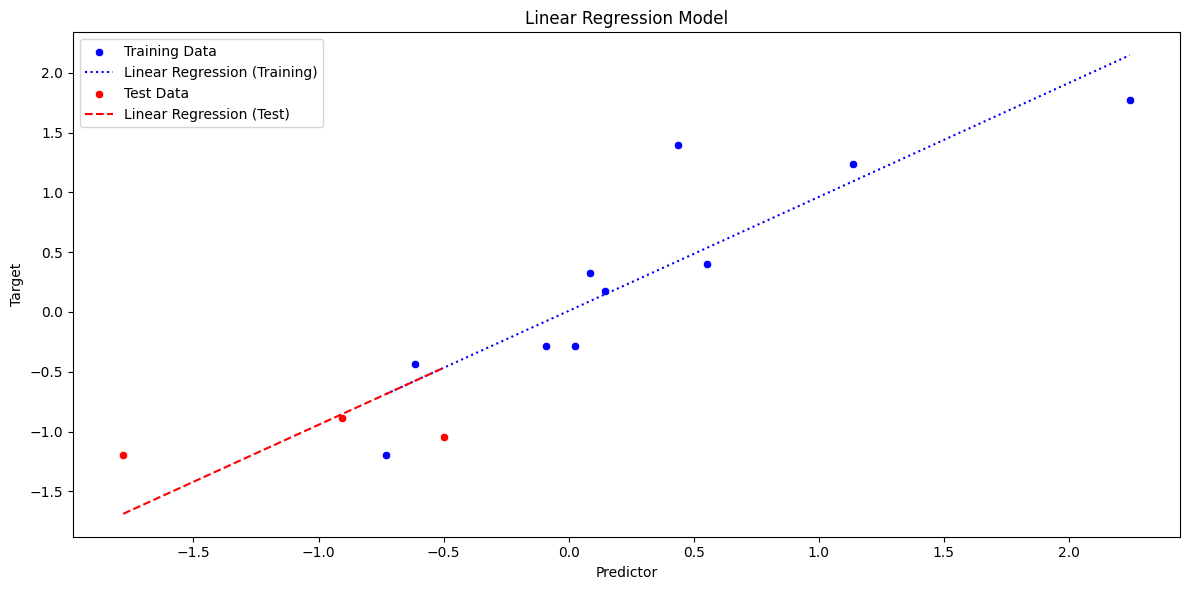

In [12]:
# create a figure and set its size
plt.figure(figsize=(12, 6))

# scatter plot for training data
sns.scatterplot(x=predictor_train, y=target_train, label="Training Data", color="blue")

# line plot for the linear regression model on training data
sns.lineplot(
    x=predictor_train,
    y=predicted_train,
    label="Linear Regression (Training)",
    linestyle="dotted",
    color="blue",
)

# scatter plot for test data
sns.scatterplot(x=predictor_test, y=target_test, label="Test Data", color="red")

# line plot for the linear regression model on test data
sns.lineplot(
    x=predictor_test,
    y=predicted_test,
    label="Linear Regression (Test)",
    linestyle="dashed",
    color="red",
)

# set labels for the x and y axes
plt.xlabel("Predictor")
plt.ylabel("Target")

# set the title of the plot
plt.title("Linear Regression Model")

# display the legend
plt.legend()

# ensure a tight layout
plt.tight_layout()

# show the plot
plt.show()